# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [73]:
df = pd.read_csv('/content/bank_transactions_data.csv')
df_original = df.copy()

print("Berhasil membaca dataset!!")

# Menampilkan beberapa baris pertama
df.head()

Berhasil membaca dataset!!


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [74]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

In [75]:
# Cek jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df.shape}")

# Cek tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Cek ringkasan statistik untuk kolom numerik
print("\nRingkasan statistik data numerik:")
print(df.describe())

# Cek ringkasan statistik untuk kolom kategorikal
print("\nRingkasan statistik data kategorikal:")
print(df.describe(include=['O']))

Jumlah baris dan kolom: (2512, 16)

Tipe data setiap kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Ringkasan statistik data numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.26000

In [76]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

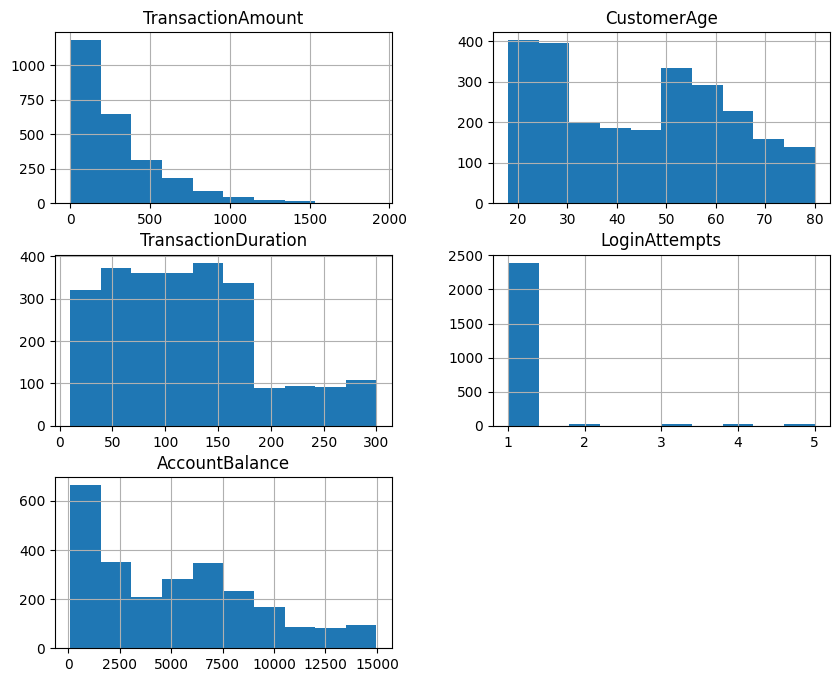

In [77]:
df[numeric_features].hist(figsize=(10, 8))
plt.show()

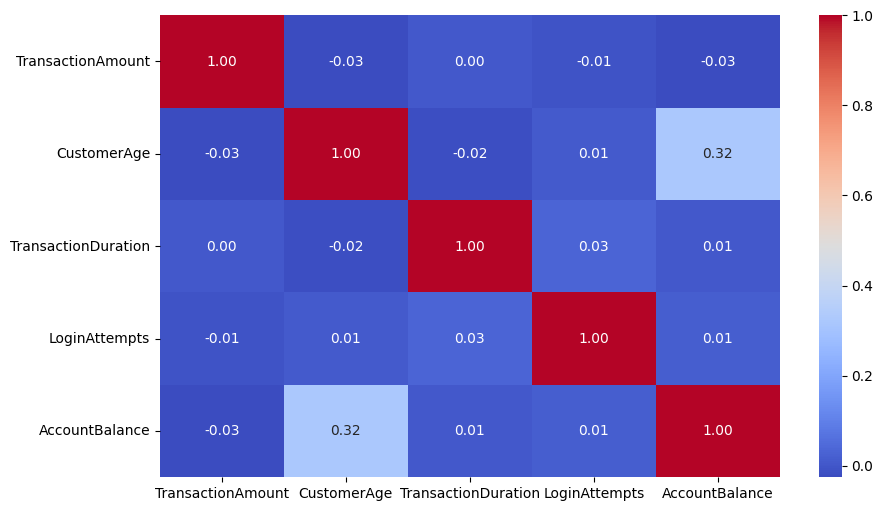

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [79]:
columns_to_drop = [
    'TransactionID', 'AccountID', 'DeviceID',
    'IP Address', 'MerchantID', 'PreviousTransactionDate'
]
df.drop(columns=set(df.columns) & set(columns_to_drop), inplace=True)

numeric_features = [
    'TransactionAmount', 'CustomerAge',
    'TransactionDuration', 'LoginAttempts', 'AccountBalance'
]
categorical_features = [
    'TransactionType', 'Location', 'Channel', 'CustomerOccupation'
]
numeric_features = [col for col in numeric_features if col in df.columns]
categorical_features = [col for col in categorical_features if col in df.columns]

df[numeric_features] = df[numeric_features].apply(lambda x: x.fillna(x.median()))
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode().iloc[0]))

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso_forest.fit_predict(df[numeric_features])
df = df[outlier_preds == 1]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

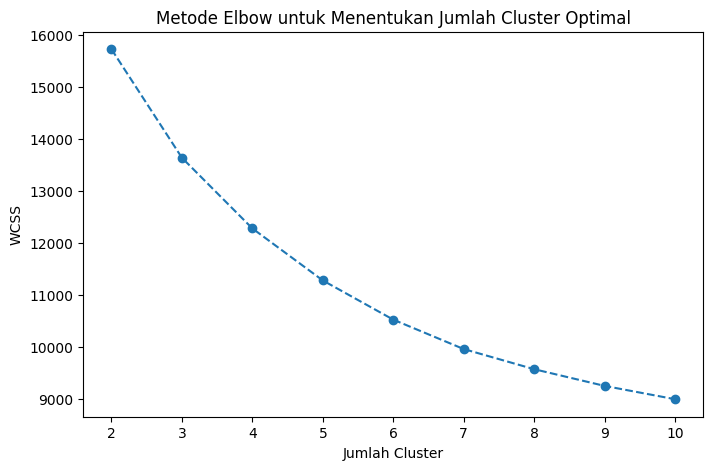

In [80]:
processed_data = preprocessor.fit_transform(df)

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [81]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(processed_data)
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [82]:
silhouette_avg = silhouette_score(processed_data, labels)
print(f'Silhouette Score sebelum feature selection: {silhouette_avg}')

Silhouette Score sebelum feature selection: 0.16940871991842812


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [83]:
try:
    processed_data = preprocessor.fit_transform(df)
    selector = VarianceThreshold(threshold=0.01)
    selected_features = selector.fit_transform(processed_data)
    print("Feature selection berhasil dilakukan.")
except Exception as e:
    print(f"Gagal melakukan feature selection: {e}")
    selected_features = processed_data

Feature selection berhasil dilakukan.


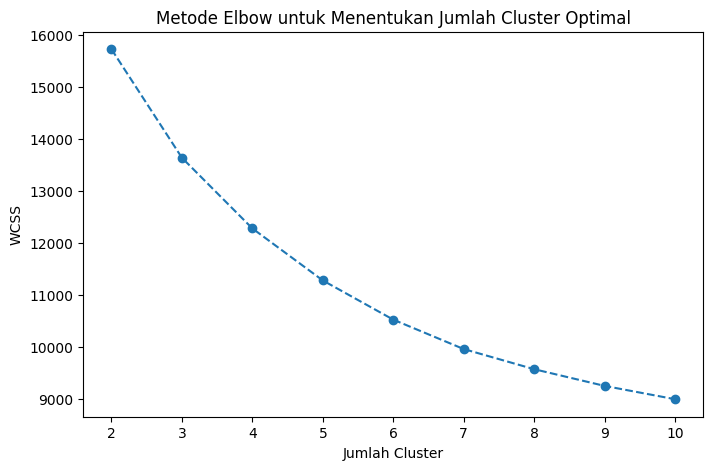

In [84]:
wcss_selected = []
for i in range(2, 11):
    kmeans_selected = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_selected.fit(selected_features)
    wcss_selected.append(kmeans_selected.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [85]:
optimal_clusters_selected = 3
kmeans_selected = KMeans(n_clusters=optimal_clusters_selected, random_state=42, n_init=10)
kmeans_selected.fit(selected_features)
labels_selected = kmeans_selected.labels_

silhouette_avg_selected = silhouette_score(selected_features, labels_selected)
print(f'Silhouette Score setelah feature selection: {silhouette_avg_selected}')
print(f'Silhouette Score sebelum feature selection: {silhouette_avg}')

print(f"Perbedaan Silhouette Score: {silhouette_avg_selected - silhouette_avg}")

Silhouette Score setelah feature selection: 0.16940871991842812
Silhouette Score sebelum feature selection: 0.16940871991842812
Perbedaan Silhouette Score: 0.0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

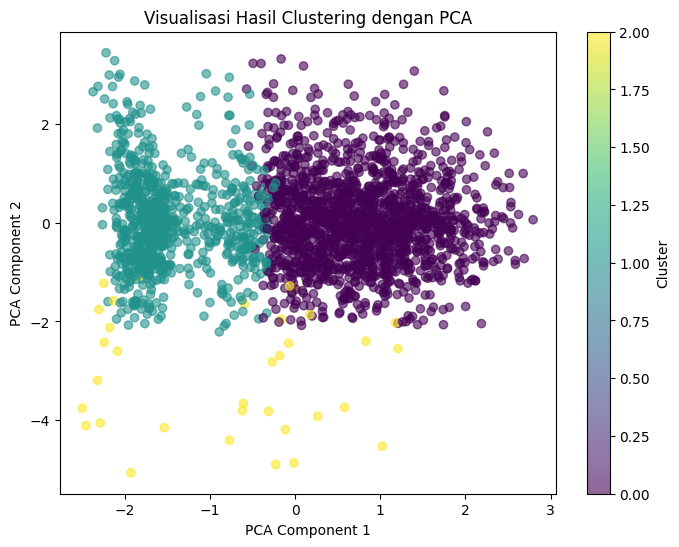

In [86]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [87]:
df_clustered = df.copy()
df_clustered['Cluster'] = labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [88]:
df[numeric_features] = preprocessor.named_transformers_['num'].inverse_transform(
    processed_data[:, :len(numeric_features)]
)

cat_encoded = processed_data[:, len(numeric_features):]
expected_columns = preprocessor.named_transformers_['cat'].categories_

if cat_encoded.shape[1] == sum(len(c) for c in expected_columns):
    df[categorical_features] = preprocessor.named_transformers_['cat'].inverse_transform(cat_encoded)
else:
    print("Warning: Dimensi encoding kategorikal tidak cocok.")

In [89]:
df['Cluster'] = labels

print("\nStatistik numerik per cluster:")
print(df.groupby('Cluster')[numeric_features].agg(['mean', 'min', 'max']))

print("\nModus kolom kategorikal per cluster:")
for col in categorical_features:
    print(f"\nModus kolom '{col}' per cluster:")
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0]))


Statistik numerik per cluster:
        TransactionAmount                 CustomerAge              \
                     mean    min      max        mean   min   max   
Cluster                                                             
0              272.833161   0.32  1237.56   54.341290  26.0  80.0   
1              294.901261   0.26  1397.59   25.856429  18.0  51.0   
2              264.902000  53.79   795.31   40.714286  18.0  73.0   

        TransactionDuration              LoginAttempts            \
                       mean   min    max          mean  min  max   
Cluster                                                            
0                117.304516  10.0  300.0      1.000000  1.0  1.0   
1                121.360799  10.0  299.0      1.000000  1.0  1.0   
2                115.400000  19.0  274.0      2.428571  2.0  3.0   

        AccountBalance                    
                  mean     min       max  
Cluster                                   
0          6789

In [90]:
print("\nJumlah anggota per cluster:")
print(df['Cluster'].value_counts())


Jumlah anggota per cluster:
Cluster
0    1550
1     801
2      35
Name: count, dtype: int64


## **Analisis Karakteristik Cluster dari Model KMeans**

Setelah menerapkan algoritma **KMeans**, dataset terbagi menjadi **3 cluster utama** yang menunjukkan perbedaan signifikan dari segi demografi, aktivitas transaksi, dan preferensi channel layanan. Berikut adalah ringkasan karakteristik masing-masing cluster:

---

### 🔹 **Cluster 0**
- **Jumlah anggota:** 1.550 (cluster terbesar)
- **Usia rata-rata tertinggi:** 54,3 tahun
- **Rata-rata saldo akun tertinggi:** 6.789
- **Rata-rata jumlah transaksi:** 272,83
- **Durasi transaksi rata-rata:** 117 detik
- **Frekuensi login:** 1 kali
- **Jenis transaksi dominan:** Debit
- **Lokasi terbanyak:** Fort Worth
- **Channel favorit:** Branch (kantor cabang)
- **Pekerjaan dominan:** Retired

💡 *Analisis:* Cluster ini terdiri dari nasabah senior (pensiunan) dengan kestabilan finansial tinggi dan cenderung lebih nyaman menggunakan layanan fisik (branch), dengan keterlibatan digital yang rendah.

---

### 🔹 **Cluster 1**
- **Jumlah anggota:** 801
- **Usia rata-rata terendah:** 25,9 tahun
- **Rata-rata saldo akun paling rendah:** 1.779
- **Rata-rata jumlah transaksi tertinggi:** 294,90
- **Durasi transaksi rata-rata tertinggi:** 121 detik
- **Frekuensi login:** 1 kali
- **Jenis transaksi dominan:** Debit
- **Lokasi terbanyak:** Los Angeles
- **Channel favorit:** Branch
- **Pekerjaan dominan:** Student

💡 *Analisis:* Cluster ini merepresentasikan segmen mahasiswa/pelanggan muda dengan pengalaman dan kapasitas keuangan terbatas, namun aktif dalam transaksi. Meskipun muda, mereka belum menunjukkan keterlibatan digital yang tinggi.

---

### 🔹 **Cluster 2**
- **Jumlah anggota:** 35 (cluster terkecil)
- **Usia rata-rata:** 40,7 tahun
- **Rata-rata saldo akun menengah:** 4.518
- **Rata-rata jumlah transaksi terendah:** 264,90
- **Durasi transaksi rata-rata terpendek:** 115 detik
- **Frekuensi login tertinggi:** 2,4 kali
- **Jenis transaksi dominan:** Debit
- **Lokasi terbanyak:** Fort Worth
- **Channel favorit:** ATM
- **Pekerjaan dominan:** Engineer

💡 *Analisis:* Cluster ini terdiri dari profesional aktif (Engineer) yang efisien, aktif secara digital, dan lebih memilih layanan mandiri seperti ATM. Meskipun transaksinya lebih sedikit, mereka memiliki intensitas login lebih tinggi dibanding cluster lain.

---

## **Kesimpulan**

Dari segmentasi ini, kita bisa menyimpulkan tiga persona pelanggan utama:

- **Cluster 0:** Nasabah pensiunan, mapan secara finansial, lebih suka layanan tradisional.
- **Cluster 1:** Mahasiswa/muda, masih membangun finansial, aktif bertransaksi tapi tidak terlalu digital.
- **Cluster 2:** Profesional produktif, aktif secara digital, efisien, dan mandiri.

🎯 **Rekomendasi strategi:**
- Kembangkan layanan khusus pensiunan untuk Cluster 0.
- Bangun program edukasi dan promosi keuangan untuk milenial di Cluster 1.
- Tingkatkan layanan digital dan self-service untuk mendukung kebutuhan Cluster 2.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [91]:
df_clustered = df.copy()

df_clustered.to_csv('/content/Dataset_clustering.csv', index=False)
print("✅ Dataset hasil clustering (dengan data asli) berhasil disimpan ke 'Dataset_clustering.csv'")

✅ Dataset hasil clustering (dengan data asli) berhasil disimpan ke 'Dataset_clustering.csv'


In [92]:
from google.colab import files
files.download('/content/Dataset_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>